In [1]:
# Dependencies and Setup
# Pandas dependency
import pandas as pd

# Plotting dependencies
import hvplot.pandas
import matplotlib.pyplot as plt

# Linear regression dependencies and statistical dependencies
from scipy.stats import linregress
import numpy as np

In [2]:
# Load clean data CSV file created in Part 1 into a Pandas DataFrame
df = pd.read_csv("../Resources/Diversity_in_tech_companies_clean_data.csv")

# Display sample data
df.head(10)

,Unnamed: 0,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
0,0,2018,Yahoo!,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.0,0.0,100.0,100.0
1,1,2018,Google,31.0,69.0,53.0,36.0,4.0,3.0,4.0,0.0,0.0,100.0,100.0
2,2,2018,Apple,32.0,68.0,54.0,21.0,13.0,9.0,3.0,1.0,2.0,100.0,103.0
3,3,2018,Cisco,24.0,76.0,53.0,37.0,5.0,4.0,1.0,0.0,0.0,100.0,100.0
4,4,2018,eBay,40.0,60.0,50.0,39.0,6.0,3.0,1.0,1.0,0.0,100.0,100.0
5,5,2018,HP,37.0,63.0,73.0,12.0,8.0,4.0,2.0,0.0,0.0,100.0,99.0
6,6,2018,Indiegogo,50.0,50.0,58.0,28.0,7.0,4.0,0.0,3.0,0.0,100.0,100.0
7,7,2018,Nvidia,17.0,83.0,37.0,45.0,3.0,1.0,14.0,0.0,0.0,100.0,100.0
8,8,2018,Dell,28.0,72.0,69.0,9.0,11.0,10.0,0.0,1.0,0.0,100.0,100.0
9,9,2018,Ingram Micro,31.0,69.0,52.0,14.0,19.0,14.0,1.0,0.0,0.0,100.0,100.0


In [3]:
# Examine data and datatypes
print(df.shape)
print(df.info())
print(df.describe())

(91, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         91 non-null     int64  
 1   Year               91 non-null     int64  
 2   Company            91 non-null     object 
 3   Female %           91 non-null     float64
 4   Male %             91 non-null     float64
 5   % White            91 non-null     float64
 6   % Asian            91 non-null     float64
 7   % Latino           91 non-null     float64
 8   % Black            91 non-null     float64
 9   % Multi            91 non-null     float64
 10  % Other            91 non-null     float64
 11  % Undeclared       91 non-null     float64
 12  Gender Total %     91 non-null     float64
 13  Diversity Total %  91 non-null     float64
dtypes: float64(11), int64(2), object(1)
memory usage: 10.1+ KB
None
       Unnamed: 0         Year   Female %     Male 

## Standarize colors on all charts

In [4]:
diversity_colors = {'% White':'#EC111A', 
          '% Asian':'#F2609E', 
          '% Black':'#FFD42F', 
          '% Latino':'#138468', 
          '% Multi':'#009DD6', 
          '% Other':'#FB6330', 
          '% Undeclared':'#7849B8'}
gender_colors = ['lightblue', 'pink']

## Question 3: How do Black people and Latino people compare over time?

In [5]:
# Define a function to create Linear Regression plots
def plot_linear_regression(gender, race, xlimits, ylimits, text_coordinates):
    
    # 1. Get the data
    x_values = df[f"{gender} %"]
    y_values = df[f"% {race}"]

    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # 2. Make the canvas
    plt.figure(figsize=(10,6))

    # 3. Make the scatter plot
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values, edgecolors='black', color=diversity_colors[f'% '+race])
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, (text_coordinates), fontsize=15, color="red")
    plt.title(f'Percent {gender} vs {race} total people', fontsize=16, fontweight='bold', color='black')
    plt.xlabel(f'{gender} %')
    plt.ylabel(f'% {race}')
    plt.xlim(xlimits)
    plt.ylim(ylimits)
    plt.grid(linestyle='--', alpha=0.5, color='lightgray')

    print(f"The r-value is: {rvalue}")

    # 4. Save/Show the plot
    plt.savefig(f"images/{gender}_{race}_linregress.png")
    plt.show()

The r-value is: 0.5303890671662571


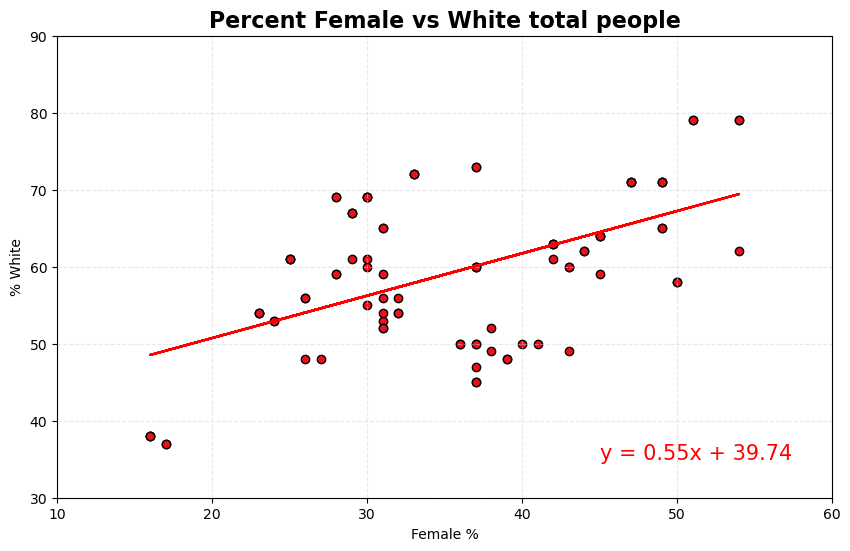

In [6]:
# Linear regression on Percentage of Females vs. Percentage of White
# 1. Get the data
gender = 'Female'
race = 'White'

plot_linear_regression(gender, race, (10,60), (30,90), (45,35))

The r-value is: -0.3324449484504086


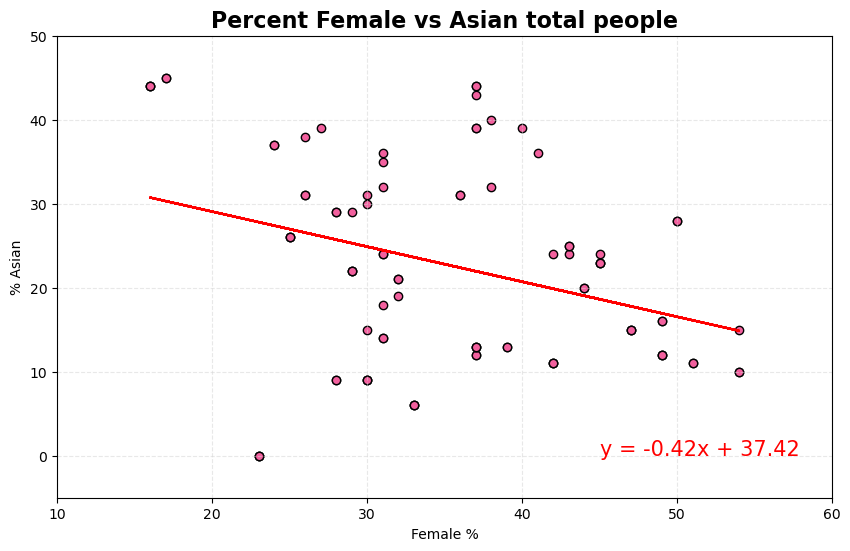

In [7]:
# Linear regression on Percentage of Females vs. Percentage of Asian
# 1. Get the data
gender = 'Female'
race = 'Asian'

plot_linear_regression(gender, race, (10,60), (-5,50), (45,0))

The r-value is: 0.12619415936237163


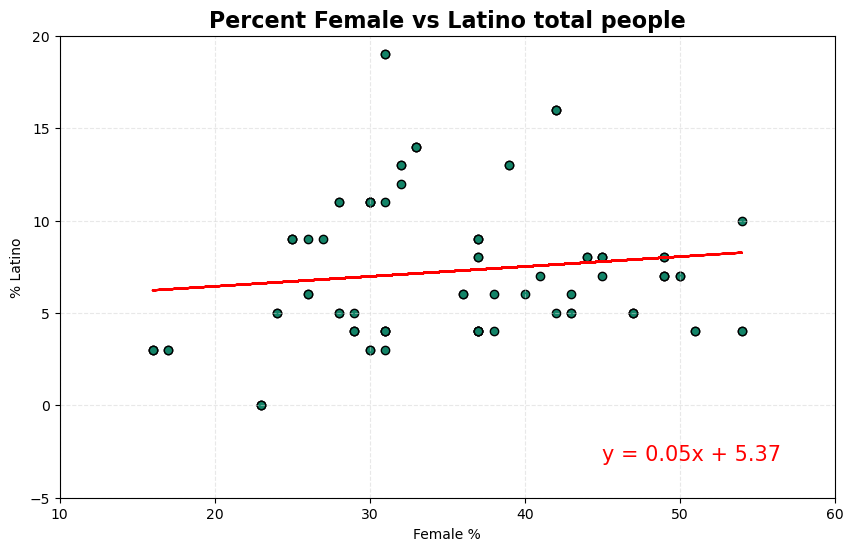

In [8]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Latino'

plot_linear_regression(gender, race, (10,60), (-5,20), (45,-3))

The r-value is: 0.129054411090084


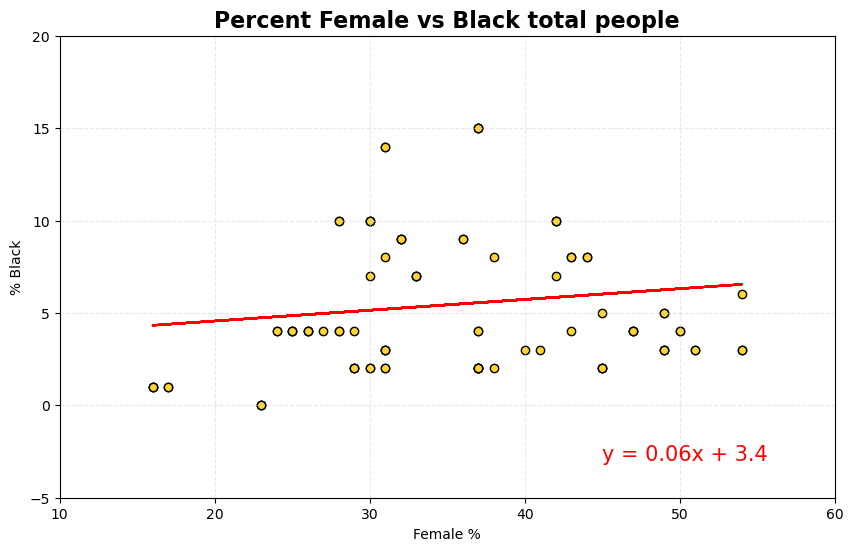

In [9]:
# Linear regression on Percentage of Females vs. Percentage of Black
# 1. Get the data
gender = 'Female'
race = 'Black'

plot_linear_regression(gender, race, (10,60), (-5,20), (45,-3))

The r-value is: -0.2827638422658497


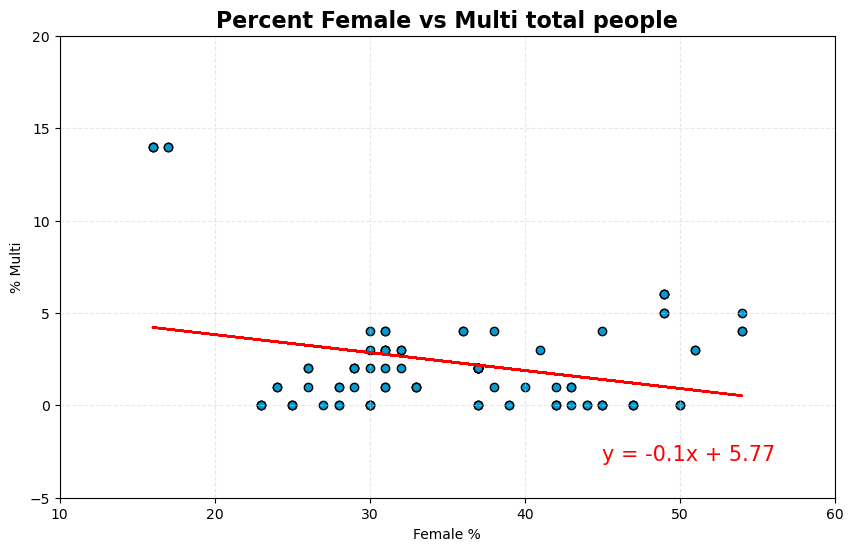

In [10]:
# Linear regression on Percentage of Females vs. Percentage of Multi
# 1. Get the data
gender = 'Female'
race = 'Multi'

plot_linear_regression(gender, race, (10,60), (-5,20), (45, -3))

The r-value is: 0.38500697865209366


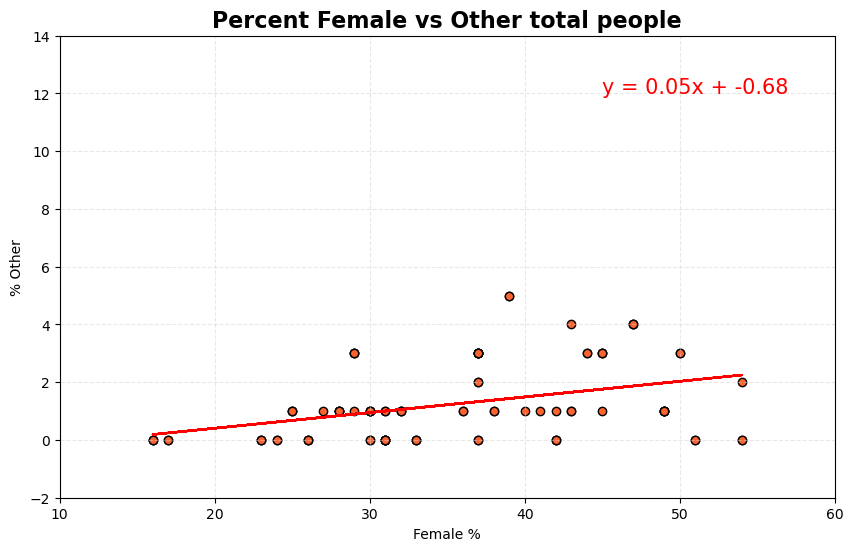

In [11]:
# Linear regression on Percentage of Females vs. Percentage of Other
# 1. Get the data
gender = 'Female'
race = 'Other'

plot_linear_regression(gender, race, (10,60), (-2,14), (45,12))

The r-value is: -0.008326365103854521


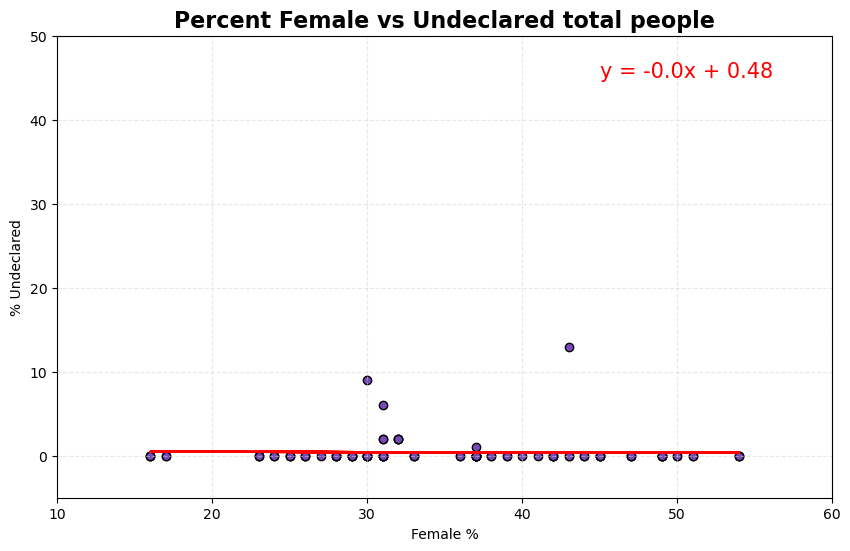

In [12]:
# Linear regression on Percentage of Females vs. Percentage of Multi
# 1. Get the data
gender = 'Female'
race = 'Undeclared'

plot_linear_regression(gender, race, (10,60), (-5,50), (45,45))

The r-value is: -0.5271368626470714


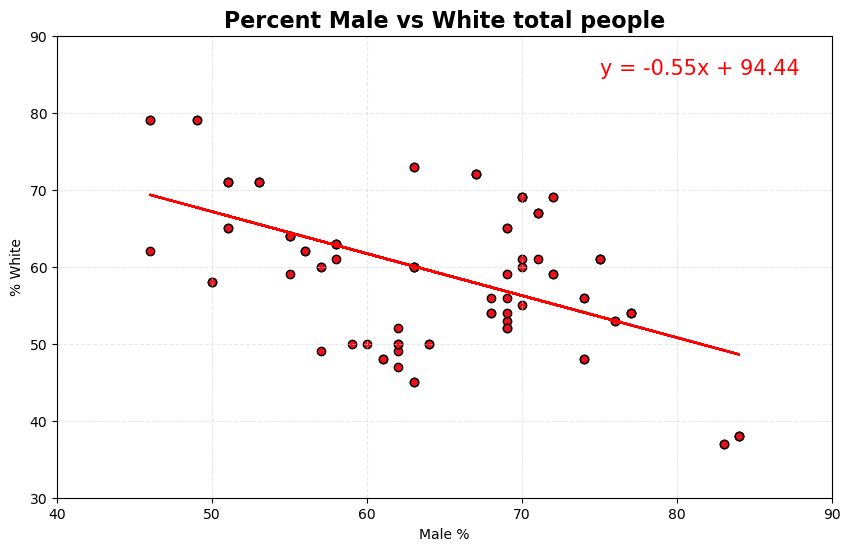

In [13]:
# Linear regression on Percentage of Males vs. Percentage of White
# 1. Get the data
gender = 'Male'
race = 'White'

plot_linear_regression(gender, race, (40,90), (30,90), (75,85))

The r-value is: 0.3282784446223


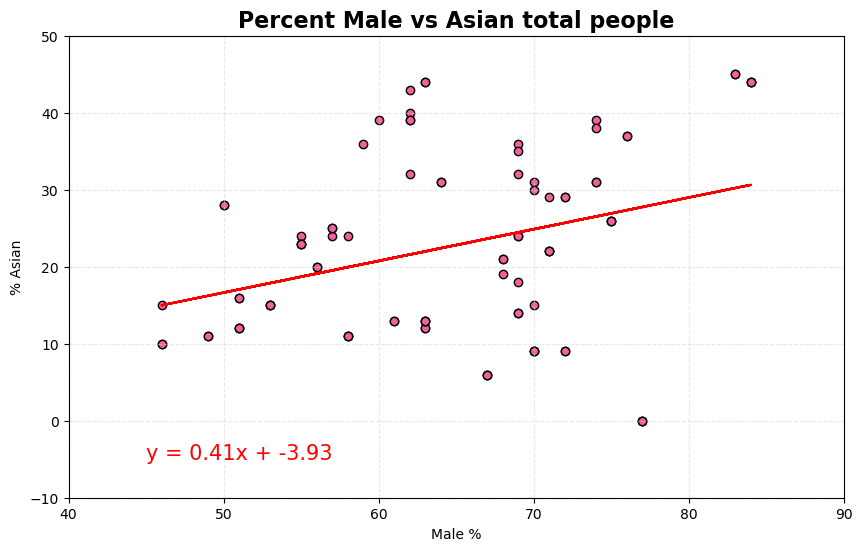

In [14]:
# Linear regression on Percentage of Males vs. Percentage of Asian
# 1. Get the data
gender = 'Male'
race = 'Asian'

plot_linear_regression(gender, race, (40,90), (-10,50), (45,-5))

The r-value is: -0.12266358296281023


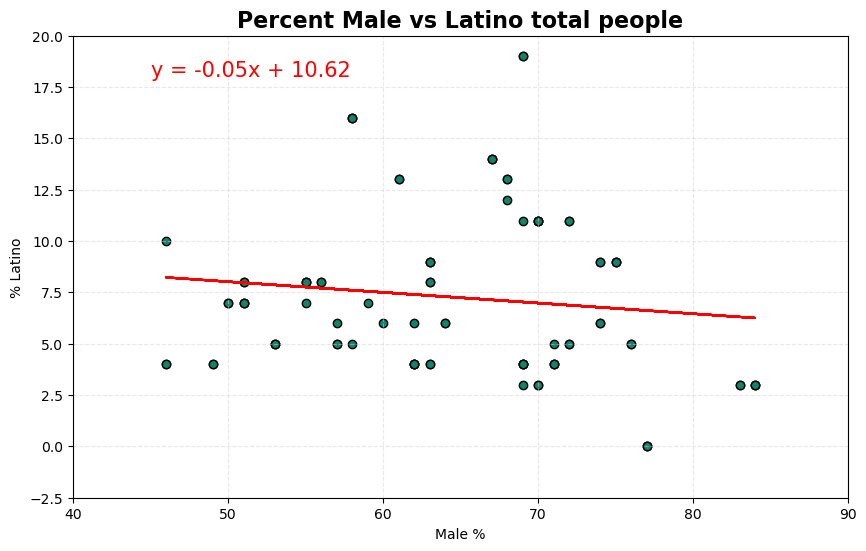

In [15]:
# Linear regression on Percentage of Males vs. Percentage of Latinos
# 1. Get the data
gender = 'Male'
race = 'Latino'

plot_linear_regression(gender, race, (40,90), (-2.5,20), (45,18))

The r-value is: -0.12641674892350707


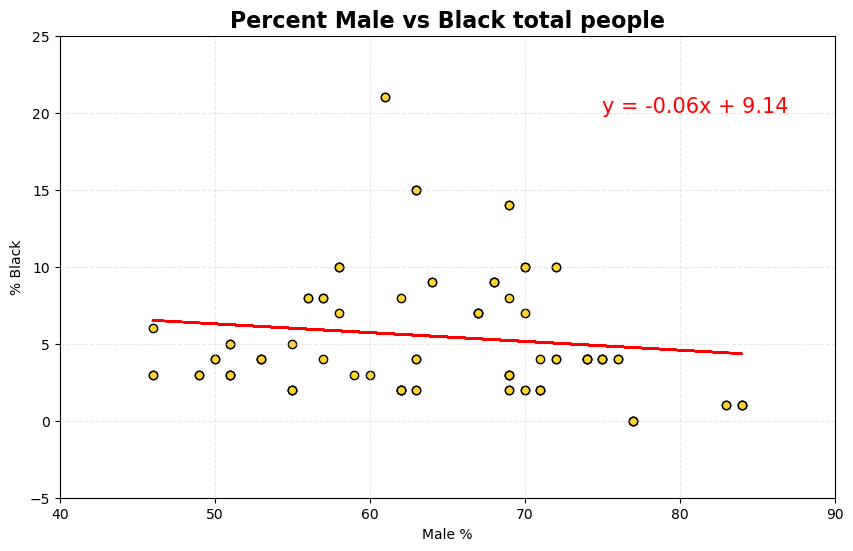

In [16]:
# Linear regression on Percentage of Males vs. Percentage of Black
# 1. Get the data
gender = 'Male'
race = 'Black'

plot_linear_regression(gender, race, (40,90), (-5,25), (75,20))

The r-value is: 0.2817691790773232


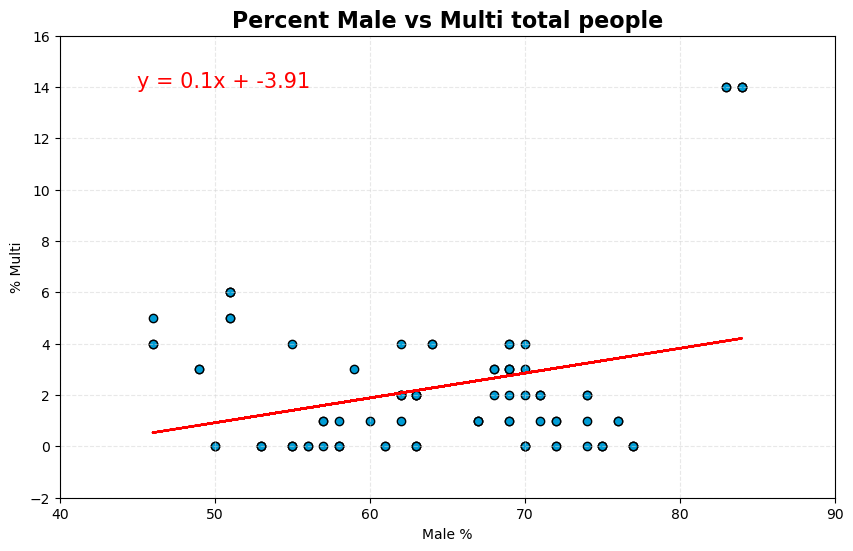

In [17]:
# Linear regression on Percentage of Males vs. Percentage of Multi
# 1. Get the data
gender = 'Male'
race = 'Multi'

plot_linear_regression(gender, race, (40,90), (-2,16), (45,14))

The r-value is: -0.3873345601229458


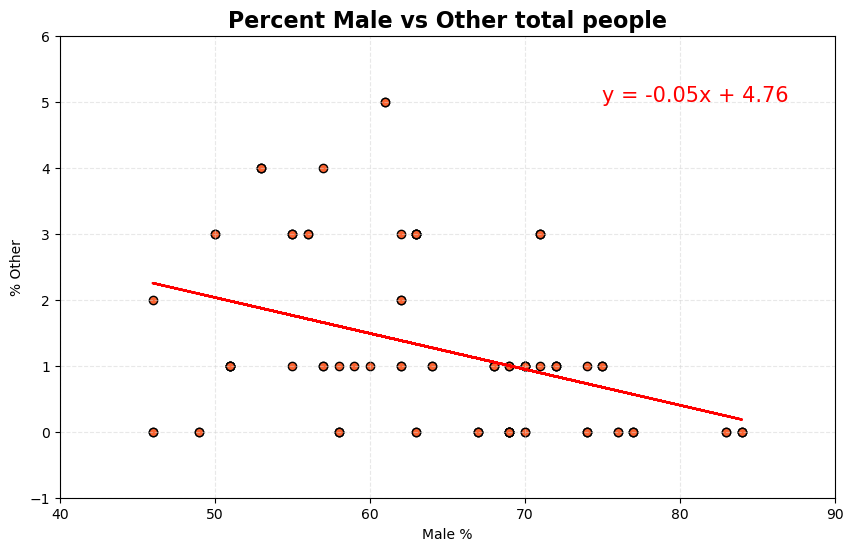

In [18]:
# Linear regression on Percentage of Males vs. Percentage of Other
# 1. Get the data
gender = 'Male'
race = 'Other'

plot_linear_regression(gender, race, (40,90), (-1,6), (75,5))

The r-value is: 0.008218690341416096


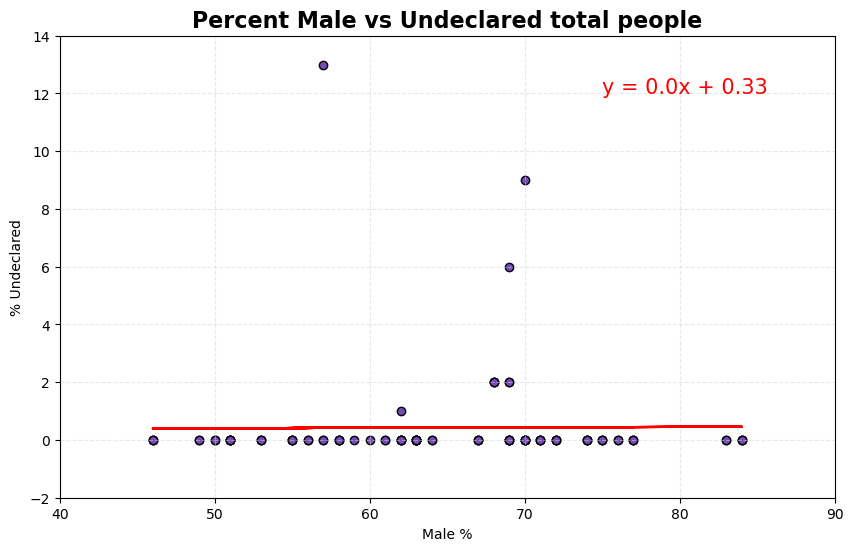

In [19]:
# Linear regression on Percentage of Males vs. Percentage of Undeclared
# 1. Get the data
gender = 'Male'
race = 'Undeclared'

plot_linear_regression(gender, race, (40,90), (-2,14), (75,12))